# Computer Vision Masterclass - Autoencoders for image compression

## Linear autoencoder

### Importing the libraries

In [1]:
!pip install tensorflow-gpu==2.9.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten
from tensorflow.keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset

- Dataset: https://keras.io/api/datasets/mnist/

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_train.shape, y_test.shape

((60000, 28, 28), (10000,))

In [6]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [7]:
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


### Visualizing the images

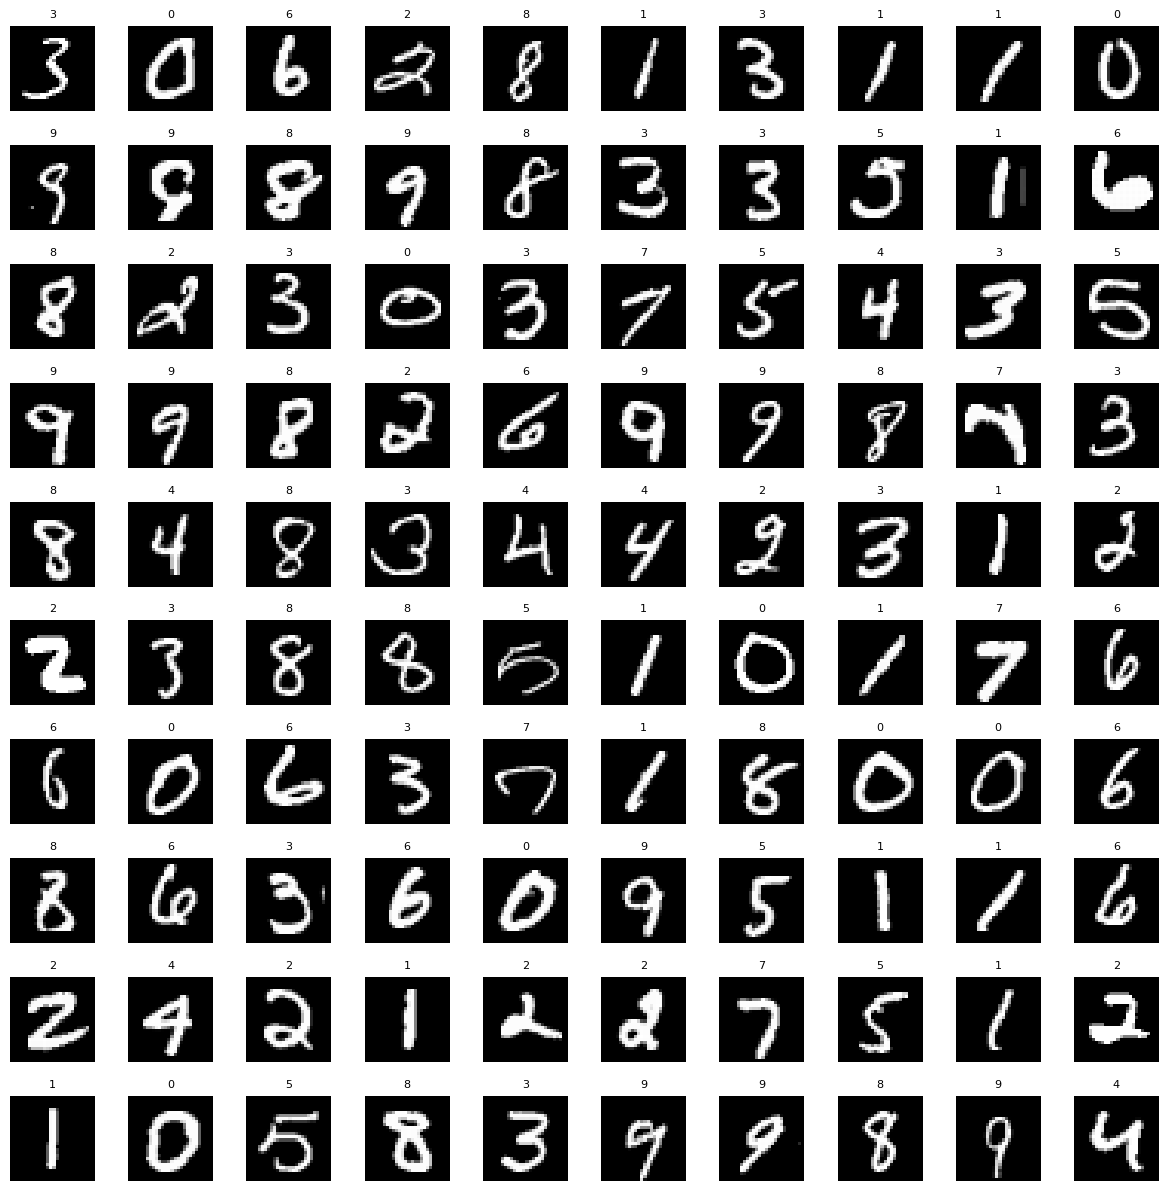

In [8]:
width = 10
height = 10
fig, axes = plt.subplots(height, width, figsize=(15, 15))

axes = axes.ravel() # change (10, 10) matrix to [100] array
for i in np.arange(0, width * height):
  index = np.random.randint(0, X_train.shape[0]-1)
  axes[i].imshow(X_train[index], cmap='gray')
  axes[i].set_title(y_train[index], fontsize=8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

### Pre-processing the images

In [9]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

In [12]:
# Since the input layer of auto encoder is linear, we must flatten X.
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_train.shape

(60000, 784)

In [13]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_test.shape

(10000, 784)

### Building and training the linear autoencoder

In [14]:
input_size = X_train.shape[1]

autoencoder = Sequential()

# Encoder
autoencoder.add(Dense(units=128, activation='relu', input_dim=input_size))
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=32, activation='relu')) # Encoded image

# Decoder
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=128, activation='relu'))
autoencoder.add(Dense(units=input_size, activation='sigmoid'))


In [15]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [16]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# Because we need to predict the images of X_train, we put X_train as both parameters of fit method.
autoencoder.fit(X_train, X_train)

1875/1875 [==============================] - 11s 4ms/step - loss: 0.1544 - accuracy: 0.0098


In [18]:
autoencoder.fit(X_train, X_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1106 - accuracy: 0.0116
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1019 - accuracy: 0.0116
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0980 - accuracy: 0.0113
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0951 - accuracy: 0.0121
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0928 - accuracy: 0.0126
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0912 - accuracy: 0.0122
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0899 - accuracy: 0.0132
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0887 - accuracy: 0.0132
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0878 - accuracy: 0.0141
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.087

### Encoding the images

In [19]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('dense_2').output)

In [20]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


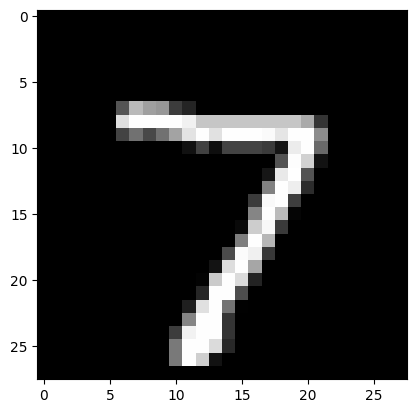

In [21]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

In [22]:
encoded_image = encoder.predict(X_test[0].reshape(1, -1))

1/1 [==============================] - 0s 156ms/step


In [23]:
encoded_image.shape

(1, 32)

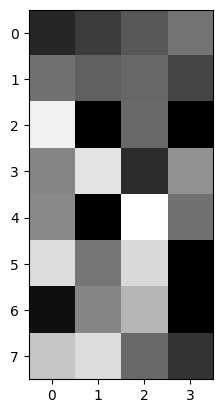

In [24]:
plt.imshow(encoded_image.reshape(8,4), cmap='gray')

### Decoding the images

In [25]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs=input_layer_decoder, outputs=decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))

In [26]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [27]:
decoded_image = decoder.predict(encoded_image)

1/1 [==============================] - 0s 72ms/step


In [28]:
decoded_image.shape

(1, 784)

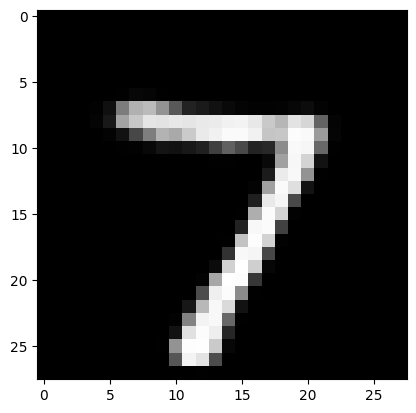

In [29]:
plt.imshow(decoded_image.reshape(28, 28), cmap='gray')

### Encoding and decoding the test images

1/1 [==============================] - 0s 27ms/step


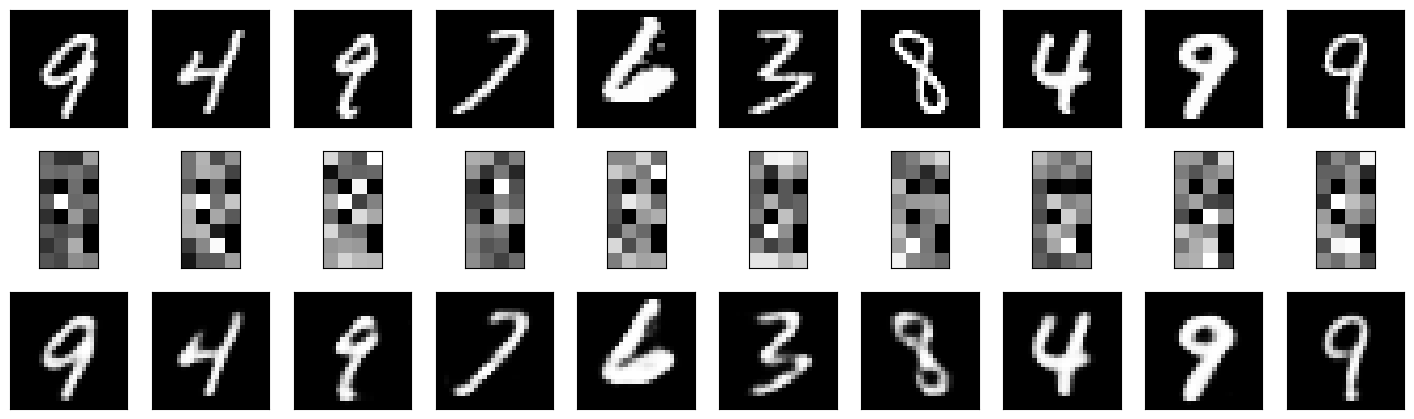

In [30]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0]-1, size=n_images)
plt.figure(figsize=(18, 18))
for i, image_index in enumerate(test_images):
  # Real images
  ax = plt.subplot(10, 10, i+1)
  plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Encoded images
  ax = plt.subplot(10, 10, i + 1 + n_images)
  encoded_image = encoder.predict(X_test[image_index].reshape(1, -1))
  plt.imshow(encoded_image.reshape(8, 4), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10, 10, i + 1 + n_images * 2)
  plt.imshow(decoder.predict(encoded_image).reshape(28, 28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

## Convolutional autoencoders

### Loading the dataset

- Dataset: https://keras.io/api/datasets/fashion_mnist/

In [31]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [32]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [33]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

### Visualizing the images

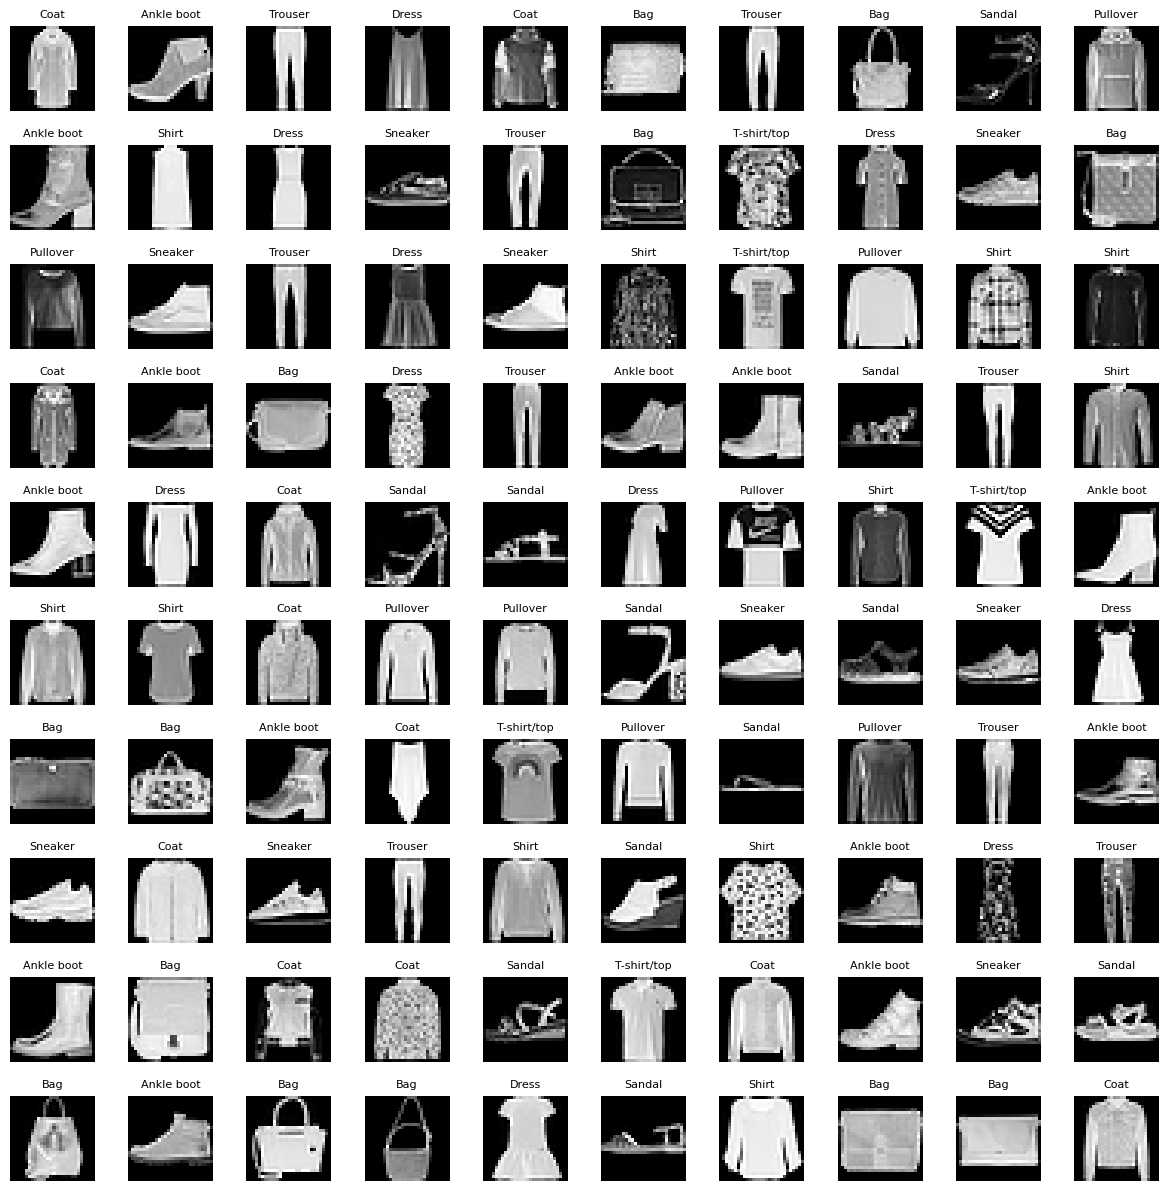

In [34]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
width = 10
height = 10

fig, axes = plt.subplots(height, width, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, width * height):
    index = np.random.randint(0, 60000)
    axes[i].imshow(X_train[index], cmap = 'gray' )
    axes[i].set_title(classes[y_train[index]], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

### Pre-processing the images

In [35]:
X_train = X_train / 255
X_test = X_test / 255

In [36]:
X_train = X_train.reshape((len(X_train), 28, 28, 1))
X_test = X_test.reshape((len(X_test), 28, 28, 1))

In [37]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Building and training the convolutional autoencoder
<br>
<img src="https://github.com/csh970605/Computer-Vision-Masterclass/assets/28240052/edcb536c-7236-4c77-9bb6-9f907a32aa6f" width = 800>

In [38]:
autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))
autoencoder.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding='same'))
autoencoder.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid',strides=(2,2)))
autoencoder.add(Flatten())

# Decoder
autoencoder.add(Reshape((3,3,128)))
autoencoder.add(UpSampling2D(size=(5,5)))
autoencoder.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='valid', strides=(2,2)))
autoencoder.add(UpSampling2D(size=(2,2)))
autoencoder.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))
autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)             

In [39]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
autoencoder.fit(X_train, X_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2944 - accuracy: 0.5057
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2739 - accuracy: 0.5084
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2691 - accuracy: 0.5089
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2667 - accuracy: 0.5091
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2650 - accuracy: 0.5092
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2639 - accuracy: 0.5093
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2630 - accuracy: 0.5094
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2625 - accuracy: 0.5094
Epoch 9/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2619 - accuracy: 0.5095
Epoch 10/50
1875/1875 [==============================] - 10s 5ms/step - loss:

### Encoding and decoding the test images

In [41]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.layers[5].output)
encoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         7385

In [42]:
encoded_test_images = encoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [43]:
encoded_test_images.shape

(10000, 1152)

In [44]:
decoded_test_images = autoencoder.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [45]:
decoded_test_images.shape

(10000, 28, 28, 1)

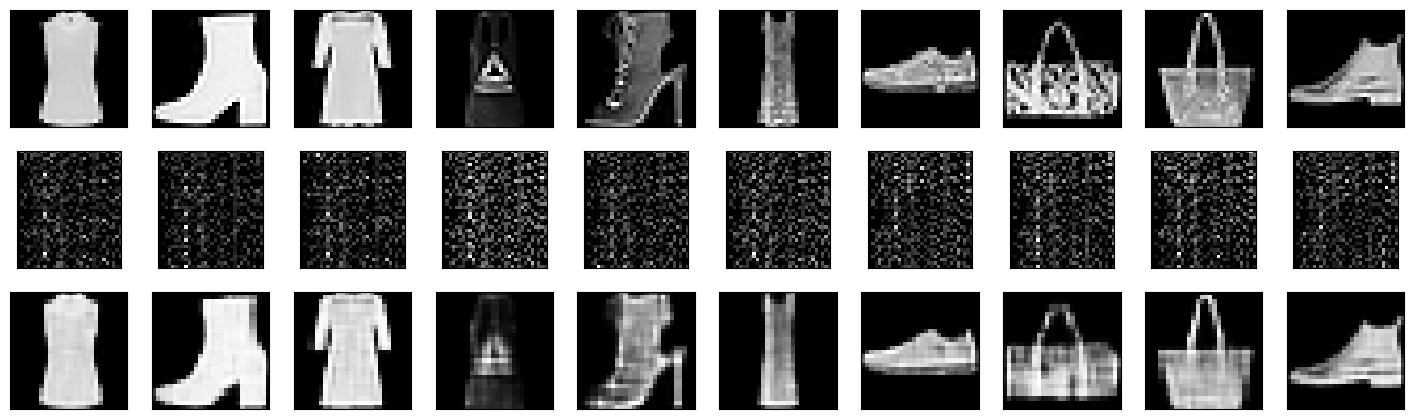

In [46]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0], size = n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  # Original images
  ax = plt.subplot(10,10, i + 1)
  plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Coded images
  ax = plt.subplot(10,10, i + 1 + n_images)
  plt.imshow(encoded_test_images[image_index].reshape(36,32), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10, i + 1 + n_images * 2)
  plt.imshow(decoded_test_images[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())